<a href="https://colab.research.google.com/github/aqafridi/DeepLearning/blob/main/Neural_Networks_in_python_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')
XX, yy = mnist["data"], mnist["target"]

(70000, 784)
(70000,)
5


Text(0.5, 1.0, '5')

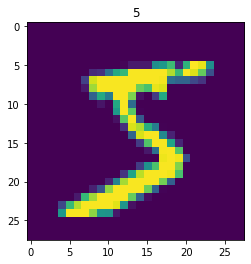

In [2]:
X=np.array(XX)
y=np.array(yy,dtype=int)
print(X.shape)
print(y.shape)
print(y[0])
img=X[0]
plt.imshow(img.reshape((28,28)))
plt.title(y[0])

In [3]:
print("train data")
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(y==i))
    y_value[0,i-1]= np.count_nonzero(y==i)

train data
occurance of  0 = 6903
occurance of  1 = 7877
occurance of  2 = 6990
occurance of  3 = 7141
occurance of  4 = 6824
occurance of  5 = 6313
occurance of  6 = 6876
occurance of  7 = 7293
occurance of  8 = 6825
occurance of  9 = 6958


<BarContainer object of 10 artists>

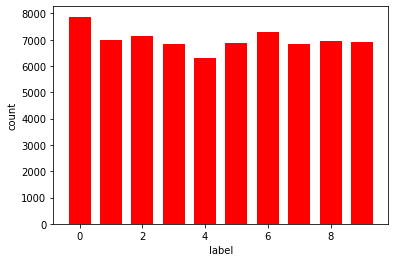

In [4]:
y_value=y_value.ravel()
x_value=[0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value,y_value,0.7,color='r')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=10000, random_state=4)
# x_train, x_test, y_train, y_test = train_test_split(X, y)

In [6]:
print('x_train  '+ str(x_train.shape))
print('y_train  '+ str(y_train.shape))
print('x_test  '+ str(x_test.shape))
print('y_test  '+ str(y_test.shape))

x_train  (60000, 784)
y_train  (60000,)
x_test  (10000, 784)
y_test  (10000,)


Text(0.5, 1.0, '1')

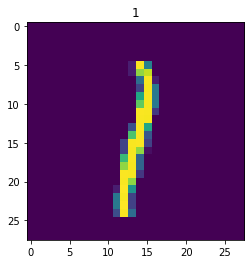

In [7]:
img=x_train[0]
plt.imshow(img.reshape((28,28)))
plt.title(y_train[0])

#Reshape the training and test examples

In [8]:
# Reshape the training and test examples 
# x_train=np.copy(x_train)
train_flat = x_train.flatten()
test_flat = x_test.flatten()
# train_flat = x_train.reshape(x_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
# test_flat = x_test.reshape(x_test.shape[0], -1).T
print ("train_flat shape: " + str(train_flat.shape))
print ("test_flat shape:  " + str(test_flat.shape))

train_flat shape: (47040000,)
test_flat shape:  (7840000,)


# Standardize data to have feature values between 0 and 1.

In [9]:
X_train = train_flat/255 
X_test = test_flat/255
print ("train_x's shape: " + str(X_train.shape))
print ("test_x's shape: " + str(X_test.shape))
print ("train_y's shape: " + str(y_train.shape))
print ("test_y's shape: " + str(y_test.shape))

train_x's shape: (47040000,)
test_x's shape: (7840000,)
train_y's shape: (60000,)
test_y's shape: (10000,)


In [10]:
def softmax(z):
    e_x = np.exp(z)
    A= e_x / np.sum(np.exp(z))  
    cache=z
    return A,cache 
    
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


In [11]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [12]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+ b)                                   # compute activation
    cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
#FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
# FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [18]:
# GRADED FUNCTION: model

def model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [19]:
# FUNCTION: model
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

IndexError: ignored